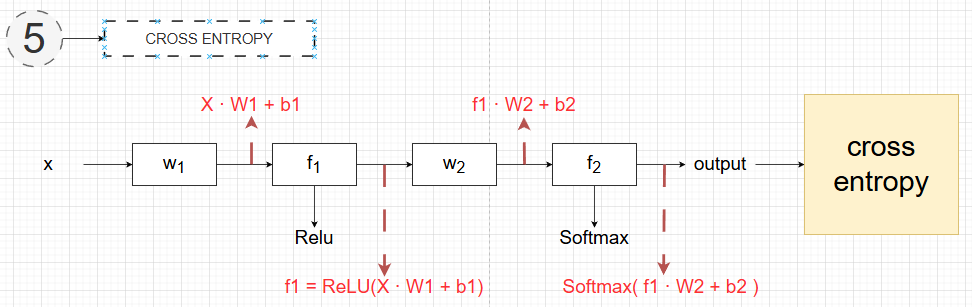

In [8]:
!pip install nnfs
!pip install matplotlib

In [9]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

In [10]:
class Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

In [11]:
class Activation_RELU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

In [12]:
class Activation_Softmax:
    def forward(self, inputs):
        self.inputs = inputs

        # Numerical stability
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

In [13]:
class Loss_CategoricalCrossentropy:
    def forward(self, y_pred, y_true):

        samples = len(y_pred)

        # tránh log(0)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # labels dạng số
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        # labels one-hot
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        negative_log_likelihoods = -np.log(correct_confidences)

        # trả về loss trung bình
        return np.mean(negative_log_likelihoods)

In [14]:
X, y = spiral_data(samples=100, classes=4)

In [15]:
dense1 = Dense(2, 4)
activation1 = Activation_RELU()

dense2 = Dense(4, 4)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossentropy()

In [16]:
# Dense 1
dense1.forward(X)

# ReLU
activation1.forward(dense1.output)

# Dense 2
dense2.forward(activation1.output)

# Softmax
activation2.forward(dense2.output)

# Loss
loss = loss_function.forward(activation2.output, y)

In [17]:
print("Softmax output (first 5 samples):")
print(activation2.output[:5])

print("\nLoss:")
print(loss)

Softmax output (first 5 samples):
[[0.25       0.25       0.25       0.25      ]
 [0.2499999  0.2499998  0.2500001  0.2500002 ]
 [0.24999982 0.24999964 0.25000006 0.25000048]
 [0.24999993 0.24999966 0.24999985 0.2500006 ]
 [0.24999984 0.24999951 0.24999984 0.25000083]]

Loss:
1.3862957
